In [105]:
import pandas as pd

In [106]:
import numpy as np

In [107]:
import matplotlib.pyplot as plt

In [108]:
import matplotlib.ticker as ticker

In [109]:
import seaborn as sns

In [110]:
%matplotlib inline

In [153]:
balanco = pd.read_csv("balanços/VIVR3.csv", index_col=0, header=1)

In [154]:
balanco = balanco.T[::-1]

In [155]:
balanco.index = pd.to_datetime(balanco.index)

In [156]:
balanco.head(3)

,Ativo Total,Ativo Circulante,Caixa e Equivalentes de Caixa,Aplicações Financeiras,Contas a Receber,Estoques,Ativos Biológicos,Tributos a Recuperar,Despesas Antecipadas,Outros Ativos Circulantes,...,Patrimônio Líquido,Capital Social Realizado,Reservas de Capital,Reservas de Reavaliação,Reservas de Lucros,Lucros/Prejuízos Acumulados,Ajustes de Avaliação Patrimonial,Ajustes Acumulados de Conversão,Outros Resultados Abrangentes,Adiantamento para Futuro Aumento Capital
2008-03-31,1.574.188,1.038.745,21.671,0,278.915,705.870,0,0,0,32.289,...,730.470,785.915,0,0,0,-55.445,0,0,0,0
2008-06-30,1.655.467,982.058,9.898,0,277.777,656.909,0,0,0,37.474,...,731.049,785.915,0,0,0,-54.866,0,0,0,0
2008-09-30,1.714.766,868.794,37.253,0,273.832,507.207,0,0,0,50.502,...,709.240,785.915,0,0,0,-76.675,0,0,0,0


In [169]:
cotacao = pd.read_csv("cotações/VIVR3.csv", index_col=0)

In [170]:
cotacao.index = pd.to_datetime(cotacao.index, format="%d.%m.%Y")

In [171]:
cotacao = cotacao[::-1]

In [172]:
def parse_value(s): 
    
    if '.' in s:
        s = s.replace('.', '')        
    if ',' in s:
        s = s.replace(',', '.')  
    if '%' in s:
        s = s.replace('%', '')
        
    parts = s.split('.')
    
    fator = 1
    
    if 'K' in s:        
        fator = 1000
    elif 'M' in s:          
        fator = 1000000
    elif 'B' in s:          
        fator = 1000000000
        
    s = parts[0]
        
    if len(parts) > 1:    
        s = s + '.' + parts[1].replace('K', '').replace('M', '').replace('B', '')
        
    return float(s) * fator



In [173]:
cotacao = cotacao.applymap(lambda x: parse_value(x))


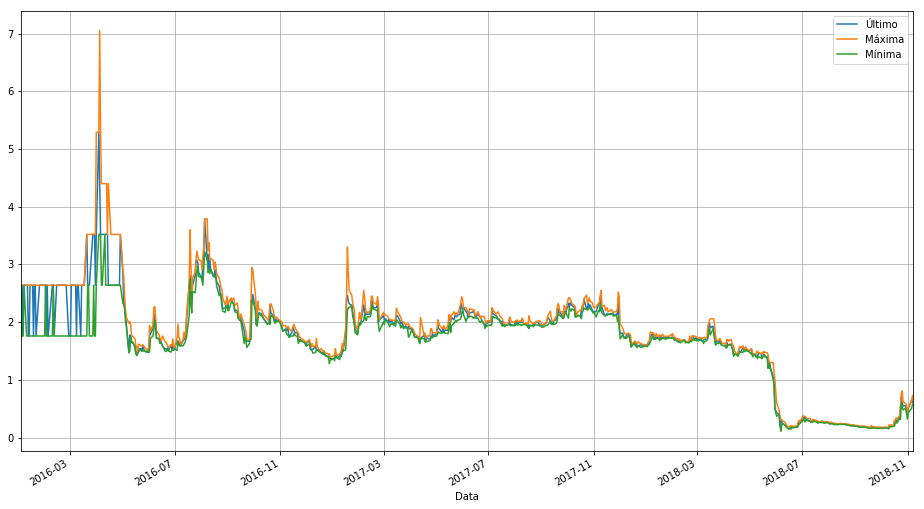

In [174]:

cotacao[["Último", "Máxima", "Mínima"]][-706:].plot(figsize=(16,9), grid=True)

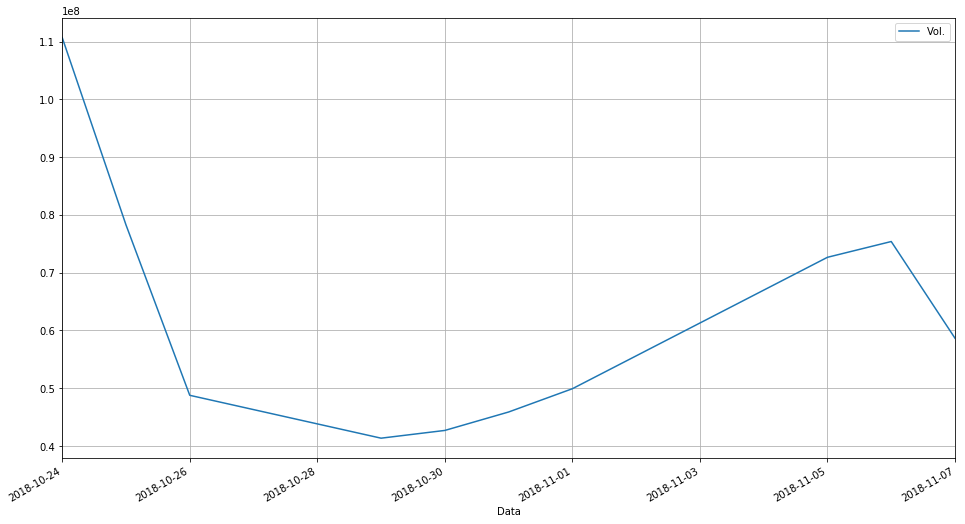

In [175]:
cotacao[["Vol."]][-10:].plot(figsize=(16,9), grid=True)

In [176]:
cotacao[["Último","Vol."]][-12:]

,Último,Vol.
Data,,
2018-10-22,0.35,55770000.0
2018-10-23,0.51,83820000.0
2018-10-24,0.70,110680000.0
2018-10-25,0.60,78260000.0
2018-10-26,0.55,48760000.0
2018-10-29,0.55,41340000.0
2018-10-30,0.44,42680000.0
2018-10-31,0.41,45870000.0
2018-11-01,0.50,49900000.0


#### Convert string to int 

In [177]:
balanco = balanco.applymap(lambda x: int(x.replace('.', '')))

In [178]:
balanco.head(3)

,Ativo Total,Ativo Circulante,Caixa e Equivalentes de Caixa,Aplicações Financeiras,Contas a Receber,Estoques,Ativos Biológicos,Tributos a Recuperar,Despesas Antecipadas,Outros Ativos Circulantes,...,Patrimônio Líquido,Capital Social Realizado,Reservas de Capital,Reservas de Reavaliação,Reservas de Lucros,Lucros/Prejuízos Acumulados,Ajustes de Avaliação Patrimonial,Ajustes Acumulados de Conversão,Outros Resultados Abrangentes,Adiantamento para Futuro Aumento Capital
2008-03-31,1574188,1038745,21671,0,278915,705870,0,0,0,32289,...,730470,785915,0,0,0,-55445,0,0,0,0
2008-06-30,1655467,982058,9898,0,277777,656909,0,0,0,37474,...,731049,785915,0,0,0,-54866,0,0,0,0
2008-09-30,1714766,868794,37253,0,273832,507207,0,0,0,50502,...,709240,785915,0,0,0,-76675,0,0,0,0


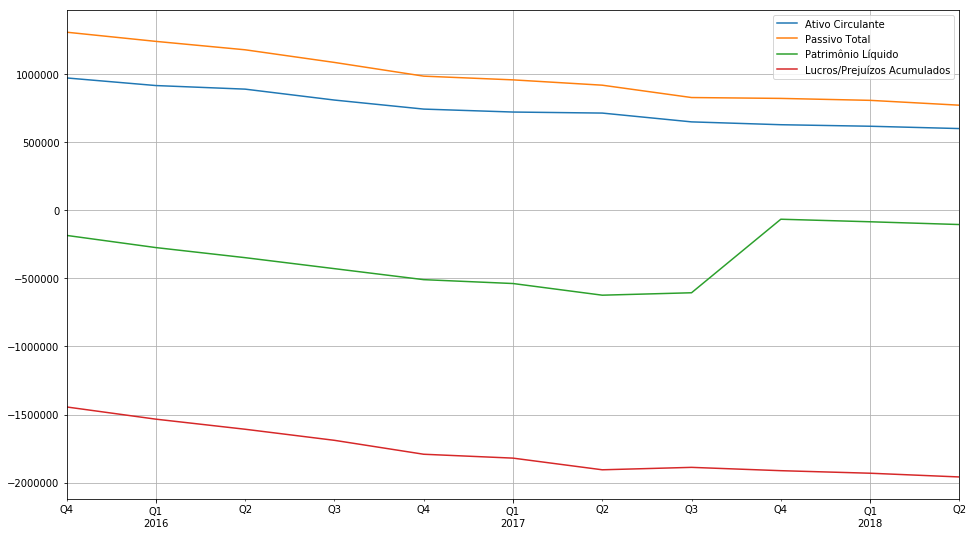

In [180]:
balanco[['Ativo Circulante', 'Passivo Total', 'Patrimônio Líquido', 'Lucros/Prejuízos Acumulados']][-11:].plot(figsize=(16,9), grid=True)

In [101]:
def currency(x, pos):
    """The two args are the value and tick position"""
    if x >= 1e6:
        s = '{:1.1f}B'.format(x*1e-6)
    else:
        s = '{:1.0f}M'.format(x*1e-3)
    return s

formatter_money = ticker.FuncFormatter(currency)

ValueError: not enough values to unpack (expected 3, got 2)

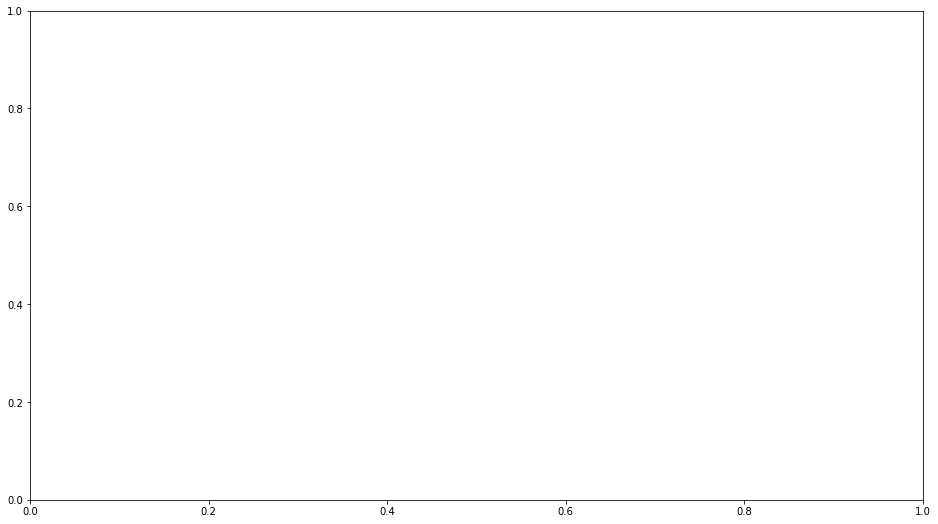

In [186]:
balanco = balanco[-11:]
fig, grafico, cotacao_graph = plt.subplots(figsize=(16,9))

x = np.arange(balanco.index.size)

grafico.plot(x, balanco["Ativo Circulante"].tolist(), label='Ativo')
grafico.plot(x, balanco["Passivo Total"].tolist(), label='Passivo')
grafico.plot(x, balanco["Patrimônio Líquido"].tolist(), label='Patrimônio')
grafico.plot(x, balanco["Lucros/Prejuízos Acumulados"].tolist(), label='Lucros/Prejuízos Acum.')

cotacao_graph.plot(706, cotacao["Último"][-706:].tolist(), label='Cot')

plt.xticks(x, balanco.index)

grafico.grid()

grafico.legend()

labels = grafico.get_xticklabels()
plt.setp(labels, rotation=45, horizontalalignment='right')

grafico.set(ylabel='Valor em R$', title='Análise de balanço - VIVR3')

grafico.yaxis.set_major_formatter(formatter_money)



